# Swiss communes explorations

## Initialization and imports

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## A. An overview of the dataset

1. Import the data as a Pandas DataFrame and name it as df.
2. Check the number of rows and columns.
3. Display the first few entries of the DataFrame.
4. Obtain the index labels, and then show the column names as a list.
5. Check the data type for each column.
6. Check if there are any missing values and show the rows that contain the missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
**NOTE**: Short, ad-hoc comments will be included as Python code comments (prefixed with #), rather than using Markdown formatting.

#### Tasks 1-6

In [23]:
# [1] Import the data as a Pandas DataFrame and name it as df.
df = pd.read_csv("p1_communes.csv")

In [44]:
# [2] Checking the number of rows and columns.
df.info(verbose=False)

# Other ways of doing it:
# a) df.describe
#     output: [2202 rows x 17 columns]
# b) len(df), len(df.columns)
#     output: (2202, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Columns: 17 entries, Canton to Elevation
dtypes: float64(9), int64(5), object(3)
memory usage: 292.6+ KB


In [46]:
# [3] Displaying the first few entries of the DataFrame.
df.head()
# NOTE: df.head(n: 'int' = 5) -> 'Self'
#       the default value is 5. there is no formal definition of "a few", but 5 is good enough.

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


In [49]:
# [4] Obtaining the index labels, and then show the column names as a list.
# NOTE:
# the index labels (these are the bold numbers from 0 to 9 on the left-hand side of the table)
df.index

RangeIndex(start=0, stop=2202, step=1)

In [50]:
df.columns.to_list()

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

In [57]:
# [5] Checking the data type for each column.
#
# The most obvious way of doing it is df.info(verbose=True)
# As always, there multiple ways of doing it.
df.dtypes  # Return the dtypes in the DataFrame.

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

#### Task 7: Cleaning up the data

In [63]:
# [6] (Approach 1) Check if there are any missing values and show the rows that contain the missing values.
#
# Here we will go for simplicity, although this is not necessarily the best solution.
# From df.info(), we see that only 'Canton' and 'Language' columns have null values (Non-Null Count < len(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

In [64]:
df[df["Canton"].isnull()]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651


In [65]:
df[df["Language"].isnull()]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


In [72]:
# Now, let's do this again, but differently.
# [6] (Approach 2) Check if there are any missing values and show the rows that contain the missing values.
df.isnull().sum()

Canton                         3
Commune                        0
Language                      11
Residents                      0
Population density per km²     0
0-19 years                     0
20-64 years                    0
65 years or over               0
Private households             0
Surface area in km²            0
Settlement area                0
Agricultural area              0
Wooded area                    0
Unproductive area              0
East coordinate                0
North coordinate               0
Elevation                      0
dtype: int64

In [79]:
# OK, so now we are certain that there are null values in df.
# sum(df.isnull().sum(axis=1)) is a nice alternative, or even sum(df.isnull().sum(axis=1)) > 0 => True
# 14 nulls in total, doesn't imply that 14 rows are problematic. 14 is the upper bound.
# Now, we need to do some filtering => get all rows that have null Language or Canton.
df[(df["Canton"].isnull() |  df["Language"].isnull())]
# worth nothing that "and, or, and not" boolean operators don't work here.

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


In [114]:
# [7] If necessary remove any observations to ensure that there are no missing values
#     and the values in each column are of the same data type.
# This is a tricky one!
# df["Language"].unique()  # => array(['de', nan, 'fr', 'rm', 'it'], dtype=object)
# So, a single commune has always one language assigned (not counting nulls).
# Let's clean it up one by one.
# df[df["Canton"]=="ZH"]["Language"].unique()  # => array(['de', nan], dtype=object)
# This tells us that German (de) is the main language in canton Zurich (ZH).
# Fixing rows 155-158: setting the language to "de"
# df[(df["Canton"]=="ZH") & (df["Language"].isnull())].fillna(value = {"Language": "de"}, inplace=True) is wrong, as it
# leads to a SettingWithCopyWarning.
df.loc[(df["Canton"]=="ZH") & (df["Language"].isnull()),"Language"] = "de"
# df[df["Canton"]=="TI"]["Language"].unique() => array(['it', nan], dtype=object)
# df[df["Canton"]=="NE"]["Language"].unique() => array(['fr', nan], dtype=object)
# Let's do the same for TI and NE cantons.
df.loc[(df["Canton"]=="TI") & (df["Language"].isnull()),"Language"] = "it"
df.loc[(df["Canton"]=="NE") & (df["Language"].isnull()),"Language"] = "fr"

# Verification.
df[(df["Canton"].isnull() |  df["Language"].isnull())]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192


In [124]:
# The Canton of the Grisons is a bit problematic, as
# df[df["Canton"]=="GR"]["Language"].unique() => array(['de', 'rm', nan, 'it'], dtype=object)
# We will need to drop it.
# Same with communes: Thurnen, Villaz and Prez. Although we could get to the bottom of it, it is not worth it for now.
df.dropna(inplace=True)
len(df)

2197

In [125]:
# Final sanity-check.
df.info()
# Maybe we could re-index it, but that's not needed.

<class 'pandas.core.frame.DataFrame'>
Index: 2197 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2197 non-null   object 
 1   Commune                     2197 non-null   object 
 2   Language                    2197 non-null   object 
 3   Residents                   2197 non-null   int64  
 4   Population density per km²  2197 non-null   float64
 5   0-19 years                  2197 non-null   float64
 6   20-64 years                 2197 non-null   float64
 7   65 years or over            2197 non-null   float64
 8   Private households          2197 non-null   int64  
 9   Surface area in km²         2197 non-null   float64
 10  Settlement area             2197 non-null   float64
 11  Agricultural area           2197 non-null   float64
 12  Wooded area                 2197 non-null   float64
 13  Unproductive area           2197 non-n

## B. Exploration: numerical summaries, indexing and grouping

1. Obtain the mean, minimum and maximum value for each column containing numerical data. Your output should preferably show only the three requested statistics and not the full table of descriptive statistics.
2. List the 10 most populated communes, ordered by their number of residents.
3. List the 10 least populated communes, ordered by their number of residents.
4. Group the communes by canton and save them into separate .csv files, e.g. a ZH.csv with all the data for communes in Zurich (**Do not** include the .csv files in your submission).
5. Compute the population density at the canton level and rank the cantons from most dense to least dense. **Clearly state and comment your observations.**
6. Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old.
7. Compute the difference between the maximum and minimum elevations for each canton. Find the top 5 cantons that have the largest range of elevations?

#### Tasks 1-4

In [148]:
# [1] Obtain the mean, minimum and maximum value for each column containing
# numerical data. Your output should preferably show only the three requested
# statistics and not the full table of descriptive statistics.
#
# df.describe() => shows more statistics
# df.describe(include=[np.number]) => a better version restricting explicitly to numerical data
stats = df.describe(include=[np.number])
stats.loc[["mean", "min", "max"]]
# NOTE: perhaps it would be nicer to transpose it (show mean, min, max as columns)

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
mean,3885.571234,433.147353,20.585297,60.369535,19.045168,1711.032772,18.034593,14.874667,45.920401,32.597210,6.607723,2.631668e+06,1.202355e+06,768.142467
min,11.000000,0.895037,0.000000,18.181818,6.271186,10.000000,0.310000,0.138897,0.000000,0.000000,0.000000,2.486700e+06,1.077200e+06,200.000000
max,415367.000000,12669.052100,37.777778,77.922078,81.818182,201252.000000,438.630000,97.260274,91.509434,88.235294,95.022860,2.828800e+06,1.294100e+06,3080.000000


In [152]:
# [2] List the 10 most populated communes, ordered by their number of residents.
df.sort_values("Residents", ascending=False).head(10)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
1749,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
194,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
141,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
535,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
1053,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
1582,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
207,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


In [159]:
# Improved version
df.sort_values("Residents", ascending=False).head(10)[["Commune", "Residents"]]

,Commune,Residents
154,Zürich,415367
2124,Genève,201818
910,Basel,172258
1749,Lausanne,139111
194,Bern,133883
141,Winterthur,111851
535,Luzern,81691
1053,St. Gallen,75833
1582,Lugano,63185
207,Biel/Bienne,55159


In [160]:
# [3] List the 10 least populated communes, ordered by their number of residents.
df.sort_values("Residents", ascending=True).head(10)[["Commune", "Residents"]]

,Commune,Residents
1546,Corippo,11
875,Kammersrohr,28
2011,Bister,33
366,Schelten,36
370,Rebévelier,41
485,Berken,45
1629,Cerentino,45
1160,Lohn (GR),46
342,Clavaleyres,46
1627,Bosco/Gurin,46


In [162]:
# or alternatively
df.sort_values("Residents", ascending=False).tail(10)[["Commune", "Residents"]]

,Commune,Residents
1160,Lohn (GR),46
1627,Bosco/Gurin,46
342,Clavaleyres,46
485,Berken,45
1629,Cerentino,45
370,Rebévelier,41
366,Schelten,36
2011,Bister,33
875,Kammersrohr,28
1546,Corippo,11


In [168]:
# [4] Group the communes by canton and save them into separate .csv files,
#     e.g. a ZH.csv with all the data for communes in Zurich
assert len(df["Canton"].unique()) == 26  # per Wikipedia
df["Canton"].unique()

array(['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO',
       'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD',
       'VS', 'NE', 'GE', 'JU'], dtype=object)

In [179]:
dry_run = True  # set it to False if you want to really create all these files.
canton_groups = df.groupby("Canton").groups
for canton in canton_groups:
    filename = f"{canton}.csv"
    df_slice = df.loc[canton_groups[canton],:]
    if dry_run:
        print(f"Creating {filename} with {len(df_slice)} rows...")
    else:
        df_slice.to_csv(filename)

#### Task 5: Population density at the canton level - comments & observations

In [297]:
# [5] Compute the population density at the canton level and rank the cantons from most dense to least dense.
residents_per_canton = df.groupby("Canton")["Residents"].sum()
total_surface_per_canton = df.groupby("Canton")["Surface area in km²"].sum()
population_density = residents_per_canton / total_surface_per_canton
population_density.name = "Density (per km²)"
population_density.sort_values(ascending=False).to_frame()

,Density (per km²)
Canton,
BS,5271.069012
GE,2031.893255
ZH,915.782375
ZG,612.265881
BL,556.593969
AG,486.145498
SO,345.618319
TG,320.320701
LU,286.577848


In [202]:
# Verification!
# Let's briefly look at BS data to make sure it's not a BS...
bs_view = df.loc[(df["Canton"]=="BS")]
bs_view

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
911,BS,Bettingen,de,1169,524.215247,19.418306,55.945252,24.636441,467,2.23,19.545455,34.545455,45.909091,0.000000,2617100,1268900,450
912,BS,Riehen,de,21339,1963.109476,20.427386,53.657622,25.914991,9614,10.87,47.566575,25.436180,24.885216,2.112029,2615300,1269500,286


In [206]:
bs_view["Residents"].sum() / bs_view["Surface area in km²"].sum()

5271.069012178619

In [207]:
# This is correct. Let's move on.

#### Tasks 6-7

In [250]:
# [6] Compute the number of communes in each canton where more than 50 percent of their populations
#     are aged between 20 and 64 years old.
#
# This looks like an aggregation + filtering problem. Maybe best to solve it with a groupby + agg combo.
#
# STEP 1: Create a dataframe with a total number of 20-64y residents per commune.
residents_per_canton = df.groupby("Canton")["Residents"].sum()  # re-using from the previous task.
midrange_age_per_commune = df["Residents"] * df["20-64 years"] / 100.0
midrange_age_per_commune.name="20-64 years residents"
midrange_df = pd.concat([df["Canton"],midrange_age_per_commune], axis=1)
midrange_df.head()

,Canton,20-64 years residents
0,ZH,1244.0
1,ZH,7500.0
2,ZH,3346.0
3,ZH,2246.0
4,ZH,2306.0


In [263]:
# STEP 2: % of total population in [20,64] age group by canton.
midrange_percentage_per_canton = midrange_df.groupby("Canton")["20-64 years residents"].sum() / residents_per_canton
assert midrange_percentage_per_canton.min() > 0.5
# Every single canton has > 50% population in 20-64 years demographic bucket.
midrange_percentage_per_canton
# NOTE: as always, we can convert it to a nice dataframe.

Canton
AG    0.621129
AI    0.596469
AR    0.601441
BE    0.601411
BL    0.588609
BS    0.628785
FR    0.619368
GE    0.624674
GL    0.608024
GR    0.607089
JU    0.581484
LU    0.620490
NE    0.598315
NW    0.614303
OW    0.610449
SG    0.612174
SH    0.600468
SO    0.613864
SZ    0.627946
TG    0.620844
TI    0.592484
UR    0.594269
VD    0.615752
VS    0.606184
ZG    0.627553
ZH    0.632531
dtype: float64

In [264]:
# STEP 3: Compute the number of communes in each canton where ...
communes_per_canton = df.groupby("Canton")["Commune"].count()
communes_per_canton.name = "Communes"
communes_per_canton.to_frame()

,Communes
Canton,
AG,210
AI,6
AR,20
BE,341
BL,86
BS,3
FR,131
GE,45
GL,3


In [285]:
# [7] Compute the difference between the maximum and minimum elevations for each canton.
#     Find the top 5 cantons that have the largest range of elevations?
df.loc[:,["Canton", "Commune", "Elevation"]].sort_values("Elevation", ascending=False)

,Canton,Commune,Elevation
1969,VS,Fieschertal,3080
2059,VS,Randa,2952
2072,VS,Zermatt,2940
2062,VS,Saas-Fee,2937
2067,VS,Täsch,2850
...,...,...,...
1614,TI,Balerna,255
1528,TI,Sant'Antonino,245
1554,TI,Muralto,226
1542,TI,Ascona,208


In [289]:
# This task looks almost identical to
# df.groupby("Musician")["Decade"].agg(
#    lambda x: str(min(x)) + "-" + str(max(x))
# ).to_frame()
# example.
#
# SOLUTION:
df.groupby("Canton")["Elevation"].agg(lambda x: max(x) - min(x)).sort_values(ascending=False).to_frame().head(5)

,Elevation
Canton,
VS,2610
TI,2044
BE,2025
GR,2017
UR,1871


In [292]:
# Verification
df.loc[df["Canton"]=="VS",["Canton", "Commune", "Elevation"]].sort_values("Elevation", ascending=False)

,Canton,Commune,Elevation
1969,VS,Fieschertal,3080
2059,VS,Randa,2952
2072,VS,Zermatt,2940
2062,VS,Saas-Fee,2937
2067,VS,Täsch,2850
...,...,...,...
2043,VS,Saint-Léonard,505
1992,VS,Charrat,502
2032,VS,Massongex,500
1958,VS,Vétroz,486


In [294]:
# 3080 - 470 = 2610
# QED

## C. Exploration: visualizations

### Tasks 1-2: Horizontal bars

1. Your task is to obtain a **horizontal** bar plot that shows the top 10 populated communes. Your bar chart should have the names of the communes listed vertically along the 
y-axis and the x-axis should show the populations. Ensure that the chart has an appropriate title and labels.

In [307]:
top10_populated_communes = df.loc[:,["Commune", "Residents"]].sort_values("Residents", ascending=False)
top10_populated_communes[:10]

,Commune,Residents
154,Zürich,415367
2124,Genève,201818
910,Basel,172258
1749,Lausanne,139111
194,Bern,133883
141,Winterthur,111851
535,Luzern,81691
1053,St. Gallen,75833
1582,Lugano,63185
207,Biel/Bienne,55159


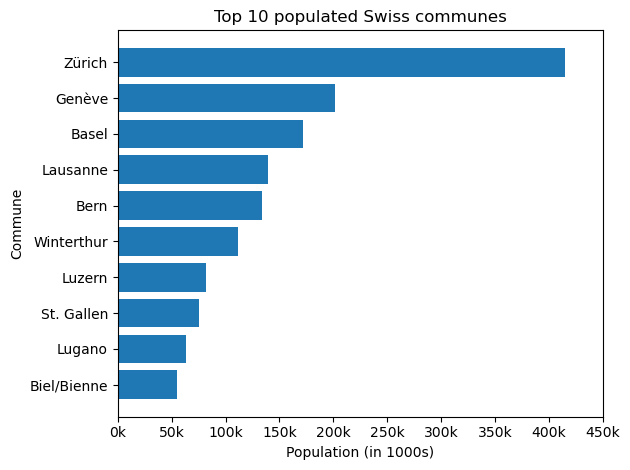

In [338]:
fig, ax = plt.subplots()

residents = top10_populated_communes[:10]["Residents"] / 1000.0
communes = top10_populated_communes[:10]["Commune"]

ax.barh(communes, residents)
ax.invert_yaxis()
ax.set_xlabel('Population (in 1000s)')
ax.set_ylabel('Commune')
ax.set_title('Top 10 populated Swiss communes')
plt.xticks([50*x for x in range(10)], [str(50*x)+'k' for x in range(10)])

fig.tight_layout()

plt.show()
# no need for seaborn here.

2. For the top 10 populated communes of the previous step, your task now is to plot a **horizontal stacked** bar chart that shows how their lands are divided into the 4 area types: Settlement, Agricultural, Wooded, Unproductive. Remember that these 4 area types represent the percentages and should add up to 100 for each commune. Ensure that the chart has an appropriate title, legend and labels. **Analyze the plot and clearly state and comment your observations.**

# D. Probabilities
The objective of this task is to assess your understanding of the conditional probability, but it could be also considered as a data exploration question.

Compute the probability that a randomly selected commune with elevation over 2000 is from the canton of Valais.

In [352]:
# Valais = VS
view = df.loc[df["Elevation"] > 2000,["Canton", "Commune", "Elevation"]]
total_num_high_communes = len(view)
view.describe()

,Elevation
count,96.000000
mean,2332.114583
std,238.798522
min,2004.000000
25%,2141.500000
50%,2302.500000
75%,2446.000000
max,3080.000000


In [353]:
view.groupby("Canton").count()

,Commune,Elevation
Canton,,
BE,5,5
GR,32,32
TI,4,4
UR,6,6
VS,49,49


In [394]:
# SOLUTION (METHOD 1):
p = 49.0 / total_num_high_communes
p

0.5104166666666666

In [402]:
# SOLUTION (METHOD 2 - verification via a simulation)
experiments = 10**5
success = 0
total = 0
for e in range(experiments):
    random_row = df.sample()
    if random_row["Elevation"].to_numpy()[0] > 2000:
        total += 1
        if random_row["Canton"].to_numpy()[0] == "VS":
            success += 1

success / total

0.5133565621370499

**Bayes’ Theorem**: P(B|A) * P(A) = P(A|B) * P(B)

* **Event A**: the commune has elevation above 2000m.
* **Event B**: the commune is from the canton of Valais (VS)

P(A) = (96 / 2197) =~ 0.04369\
P(B) = (126 / 2197) =~ 0.05735\
P(A|B) = (49 / 126) =~ 0.38888

```python
>>> from fractions import Fraction
>>> P_A = Fraction(96, 2197)
>>> P_B = Fraction(126, 2197)
>>> P_A_IF_B = Fraction(49, 126)
>>> P_B_IF_A = P_A_IF_B * P_B / P_A
>>> P_B_IF_A
Fraction(49, 96)
```
P(B|A) = 49/96 ~= 0.51041

In [404]:
# SOLUTION (METHOD 3 - Bayes' Theorem)
from fractions import Fraction
P_A = Fraction(96, 2197)
P_B = Fraction(126, 2197)
P_A_IF_B = Fraction(49, 126)
P_B_IF_A = P_A_IF_B * P_B / P_A
P_B_IF_A
float(Fraction(49, 96))

0.5104166666666666

# E. Matrices
The objective of this task is to assess some of the skills you have learned in this course, but later on you will see that it becomes an important preprocessing step before using Machine Learning models.
Define a data frame matrix whose rows correspond to communes and the columns to the cantons.
Fill in the matrix with 0/1 values where entry (i, j) is a 1 if the commune in row i is in the canton in column j and a 0 otherwise.